# **Data Exploration and Visualization**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
# Load the dataset
data = pd.read_csv('datasets_house_prices.csv')

In [57]:
# Display the first few rows
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [58]:
# Check the data types of the columns
print(data.dtypes)

Size (sqft)                        int64
Bedrooms                           int64
Age                                int64
Proximity to Downtown (miles)    float64
Price                            float64
dtype: object


In [59]:
# Describe the numerical features
print(data.describe())

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  


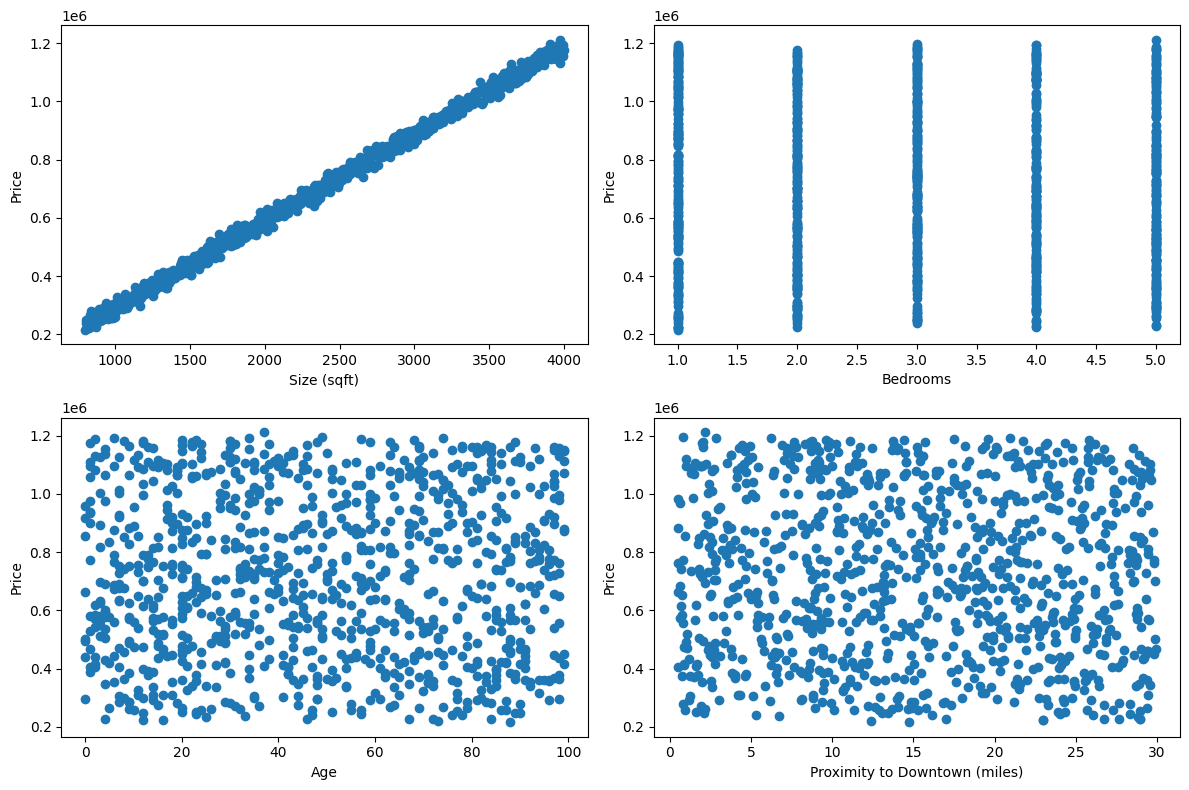

In [60]:
# Create scatter plots for each feature vs. Price
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(data['Size (sqft)'], data['Price'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price')

plt.subplot(2, 2, 2)
plt.scatter(data['Bedrooms'], data['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(2, 2, 3)
plt.scatter(data['Age'], data['Price'])
plt.xlabel('Age')
plt.ylabel('Price')

plt.subplot(2, 2, 4)
plt.scatter(data['Proximity to Downtown (miles)'], data['Price'])
plt.xlabel('Proximity to Downtown (miles)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

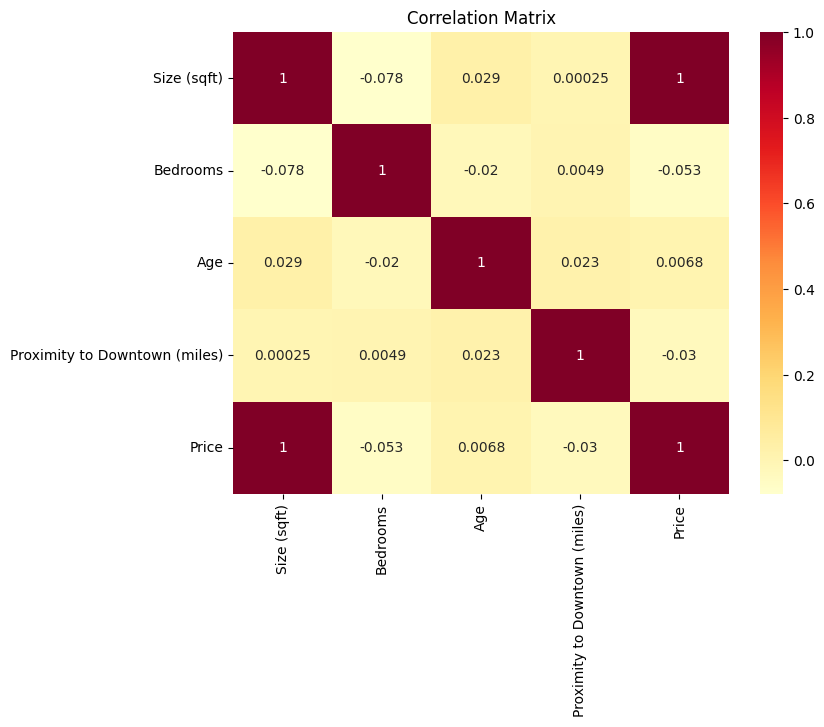

In [61]:
# Calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

# **Data Preprocessing**

In [62]:
# Select the feature columns
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]

In [63]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Model Development**

In [64]:
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
coef = model.coef_
feature_importances = pd.Series(coef, index=X.columns)
feature_importances.sort_values(ascending=False)

Bedrooms                         4779.426708
Size (sqft)                       300.151207
Age                              -208.399927
Proximity to Downtown (miles)    -990.398964
dtype: float64

# **Model Evaluation**

In [68]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

In [69]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm).fit()
adjusted_r2 = model_sm.rsquared_adj

In [70]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.332e+05
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:39:31   Log-Likelihood:                -7452.2
No. Observations:                 700   AIC:                         1.491e+04
Df Residuals:                     695   BIC:                         1.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

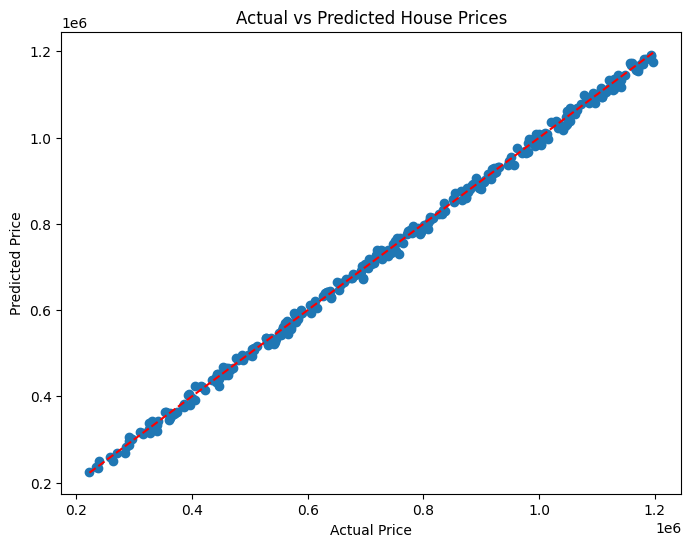

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()